In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

iracoubo gf
pevek ru
halifax ca
bali cm
rikitea pf
grand river south east mu
san patricio mx
mahebourg mu
rikitea pf
hualmay pe
ponta do sol cv
mergui mm
kapaa us
port blair in
salinopolis br
castro cl
dalbandin pk
illoqqortoormiut gl
qaanaaq gl
ushuaia ar
cape town za
poya nc
jiutai cn
ushuaia ar
rikitea pf
bodo no
bethel us
talaya ru
harigue ph
cam ranh vn
chabahar ir
longyearbyen sj
illoqqortoormiut gl
torbay ca
kenai us
dikson ru
jamestown sh
hasaki jp
punta arenas cl
cape town za
ewa beach us
lompoc us
lethem gy
aykhal ru
la libertad gt
carutapera br
hovd mn
hermanus za
tasiilaq gl
arraial do cabo br
cape town za
belen us
yatou cn
nikolskoye ru
mataura pf
vaini to
lorengau pg
qaanaaq gl
amderma ru
arrecife es
hasaki jp
punta arenas cl
vardo no
rikitea pf
hermanus za
mataura pf
nanortalik gl
ossora ru
san cristobal ec
albany au
albany au
jamestown sh
taolanaro mg
rikitea pf
geraldton au
dujuma so
yar-sale ru
doha qa
tuatapere nz
arraial do cabo br
niltepec mx
katsuura jp
port alfre

castro cl
puerto colombia co
constantine dz
port alfred za
ginir et
yerbogachen ru
jamestown sh
fernley us
attawapiskat ca
hermanus za
portland au
alyangula au
saint-philippe re
juruti br
hasaki jp
bereda so
kenai us
cape town za
san policarpo ph
taoudenni ml
lorengau pg
pisco pe
rikitea pf
taolanaro mg
bengkulu id
sao joao da barra br
oranjestad aw
port alfred za
sao joao da barra br
port alfred za
puerto ayora ec
albany au
tasiilaq gl
ndiekro ci
ushuaia ar
thompson ca
vaini to
pedasi pa
garowe so
marcona pe
vaitupu wf
jamestown sh
nikolskoye ru
zigong cn
lebu cl
airai pw
hasaki jp
surt ly
busselton au
qaanaaq gl
nanortalik gl
pochutla mx
torbay ca
ushuaia ar
hobart au
tasiilaq gl
nizhneyansk ru
hermanus za
georgetown sh
new norfolk au
norman wells ca
cape town za
nang rong th
ixtapa mx
hobart au
albany au
victoria sc
bradford us
jamestown sh
jamestown sh
barrow us
sinkat sd
albany au
verkhnevilyuysk ru
sistranda no
ushuaia ar
la baule-escoublac fr
illoqqortoormiut gl
hermanus za
nels

taolanaro mg
muscat om
hermanus za
sobolevo ru
rawson ar
punta arenas cl
busselton au
puerto ayora ec
hilo us
dalbandin pk
qaanaaq gl
bluff nz
kapaa us
sarankhola bd
luderitz na
tiznit ma
hofn is
nangong cn
punta arenas cl
pelym ru
puerto ayora ec
saint george bm
conchas br
port-cartier ca
ellisras za
sumbawa id
alofi nu
hermanus za
akdepe tm
dikson ru
jamestown sh
severo-kurilsk ru
mataura pf
shellbrook ca
yellowknife ca
ostrovnoy ru
amderma ru
severo-kurilsk ru
clyde river ca
tuktoyaktuk ca
mawlaik mm
bambous virieux mu
dikson ru
mataura pf
cape town za
hermanus za
koslan ru
bukachacha ru
ushuaia ar
touros br
mataura pf
broome au
east london za
tiksi ru
kholm af
hermanus za
hilo us
cherskiy ru
mataura pf
ziro in
bluff nz
san isidro ph
codrington ag
thinadhoo mv
general roca ar
cape town za
hobart au
arman ru
isangel vu
cape town za
nikolskoye ru
saint-philippe re
lagoa pt
rikitea pf
taolanaro mg
mataura pf
belushya guba ru
kiunga pg
adrar dz
morant bay jm
avarua ck
new norfolk au
naz

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | iracoubo
Processing Record 2 of Set 1 | pevek
Processing Record 3 of Set 1 | halifax
Processing Record 4 of Set 1 | bali
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 7 of Set 1 | san patricio
Processing Record 8 of Set 1 | mahebourg
Processing Record 9 of Set 1 | hualmay
Processing Record 10 of Set 1 | ponta do sol
Processing Record 11 of Set 1 | mergui
City not found. Skipping...
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | port blair
Processing Record 14 of Set 1 | salinopolis
Processing Record 15 of Set 1 | castro
Processing Record 16 of Set 1 | dalbandin
Processing Record 17 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 18 of Set 1 | qaanaaq
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | cape town
Processing Record 21 of Set 1 | poya
Processing Record 22 of Set 1 | jiutai
Processing

Processing Record 39 of Set 4 | nosivka
Processing Record 40 of Set 4 | beboto
Processing Record 41 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 42 of Set 4 | kamenskoye
City not found. Skipping...
Processing Record 43 of Set 4 | bilma
Processing Record 44 of Set 4 | saryozek
Processing Record 45 of Set 4 | tuktoyaktuk
Processing Record 46 of Set 4 | cherskiy
Processing Record 47 of Set 4 | banda aceh
Processing Record 48 of Set 4 | tucuma
Processing Record 49 of Set 4 | acarau
Processing Record 50 of Set 4 | pangnirtung
Processing Record 1 of Set 5 | souillac
Processing Record 2 of Set 5 | jalu
Processing Record 3 of Set 5 | rurrenabaque
Processing Record 4 of Set 5 | nouadhibou
Processing Record 5 of Set 5 | muros
Processing Record 6 of Set 5 | ukiah
Processing Record 7 of Set 5 | chuguyevka
Processing Record 8 of Set 5 | sept-iles
Processing Record 9 of Set 5 | kaitangata
Processing Record 10 of Set 5 | yakima
Processing Record 11 of Set 5 | stornoway
Processin

Processing Record 27 of Set 8 | ixtapa
Processing Record 28 of Set 8 | bradford
Processing Record 29 of Set 8 | sinkat
City not found. Skipping...
Processing Record 30 of Set 8 | verkhnevilyuysk
Processing Record 31 of Set 8 | sistranda
Processing Record 32 of Set 8 | la baule-escoublac
Processing Record 33 of Set 8 | doctor pedro p. pena
City not found. Skipping...
Processing Record 34 of Set 8 | hede
Processing Record 35 of Set 8 | aktash
Processing Record 36 of Set 8 | leshukonskoye
Processing Record 37 of Set 8 | kaabong
Processing Record 38 of Set 8 | singkawang
Processing Record 39 of Set 8 | halalo
City not found. Skipping...
Processing Record 40 of Set 8 | scarborough
Processing Record 41 of Set 8 | morehead
Processing Record 42 of Set 8 | cabo san lucas
Processing Record 43 of Set 8 | havelock
Processing Record 44 of Set 8 | paamiut
Processing Record 45 of Set 8 | pandan niog
Processing Record 46 of Set 8 | mayor pablo lagerenza
Processing Record 47 of Set 8 | ternate
Processi

Processing Record 12 of Set 12 | pelym
Processing Record 13 of Set 12 | conchas
Processing Record 14 of Set 12 | ellisras
Processing Record 15 of Set 12 | sumbawa
City not found. Skipping...
Processing Record 16 of Set 12 | alofi
Processing Record 17 of Set 12 | akdepe
Processing Record 18 of Set 12 | shellbrook
Processing Record 19 of Set 12 | ostrovnoy
Processing Record 20 of Set 12 | mawlaik
Processing Record 21 of Set 12 | koslan
Processing Record 22 of Set 12 | bukachacha
Processing Record 23 of Set 12 | kholm
Processing Record 24 of Set 12 | ziro
Processing Record 25 of Set 12 | san isidro
Processing Record 26 of Set 12 | general roca
Processing Record 27 of Set 12 | arman
Processing Record 28 of Set 12 | naze
Processing Record 29 of Set 12 | chumikan
Processing Record 30 of Set 12 | inhambane
Processing Record 31 of Set 12 | san ramon
Processing Record 32 of Set 12 | beohari
Processing Record 33 of Set 12 | kamyaran
Processing Record 34 of Set 12 | sulangan
Processing Record 35 

In [11]:
len(city_data)


547

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Iracoubo,5.4802,-53.2011,75.76,90,88,5.82,GF,2022-11-30 04:11:29
1,Pevek,69.7008,170.3133,7.18,95,100,11.97,RU,2022-11-30 04:11:29
2,Halifax,44.6453,-63.5724,28.47,74,5,4.00,CA,2022-11-30 04:10:49
3,Bali,-8.5000,115.0000,85.23,65,85,5.68,ID,2022-11-30 04:11:30
4,Rikitea,-23.1203,-134.9692,72.18,72,82,13.20,PF,2022-11-30 04:10:33
5,San Patricio,28.0170,-97.5169,71.83,92,1,3.85,US,2022-11-30 04:07:13
6,Mahebourg,-20.4081,57.7000,79.25,68,80,9.84,MU,2022-11-30 04:11:30
7,Hualmay,-11.0964,-77.6139,67.59,81,100,6.44,PE,2022-11-30 04:07:16
8,Ponta Do Sol,32.6667,-17.1000,63.23,72,18,3.40,PT,2022-11-30 04:11:30
9,Kapaa,22.0752,-159.3190,79.12,84,0,3.44,US,2022-11-30 04:11:31


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [14]:
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Iracoubo,GF,2022-11-30 04:11:29,5.4802,-53.2011,75.76,90,88,5.82
1,Pevek,RU,2022-11-30 04:11:29,69.7008,170.3133,7.18,95,100,11.97
2,Halifax,CA,2022-11-30 04:10:49,44.6453,-63.5724,28.47,74,5,4.00
3,Bali,ID,2022-11-30 04:11:30,-8.5000,115.0000,85.23,65,85,5.68
4,Rikitea,PF,2022-11-30 04:10:33,-23.1203,-134.9692,72.18,72,82,13.20
5,San Patricio,US,2022-11-30 04:07:13,28.0170,-97.5169,71.83,92,1,3.85
6,Mahebourg,MU,2022-11-30 04:11:30,-20.4081,57.7000,79.25,68,80,9.84
7,Hualmay,PE,2022-11-30 04:07:16,-11.0964,-77.6139,67.59,81,100,6.44
8,Ponta Do Sol,PT,2022-11-30 04:11:30,32.6667,-17.1000,63.23,72,18,3.40
9,Kapaa,US,2022-11-30 04:11:31,22.0752,-159.3190,79.12,84,0,3.44


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

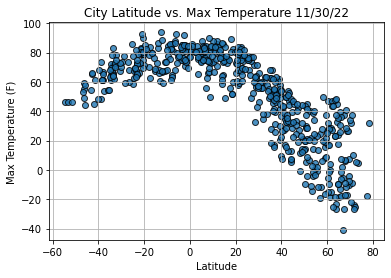

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

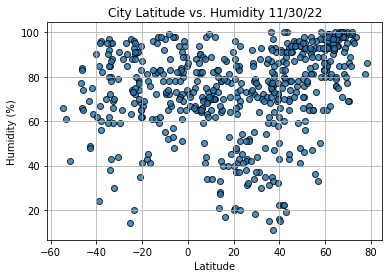

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

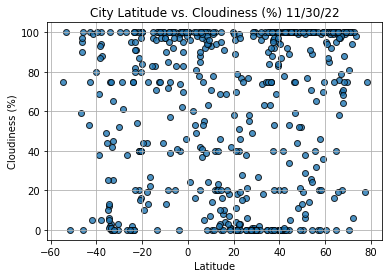

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

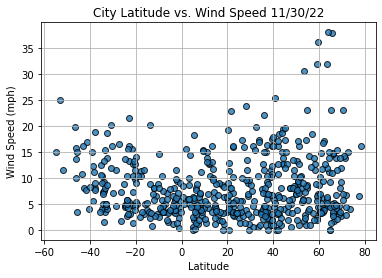

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()